# REVIEWS

## Proceso ETL

### Extracción y revisión de conjunto

Utilizaremos pyspark para la carga de los datos

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

# Inicializa una sesión Spark
spark = SparkSession.builder.appName("mi_aplicacion").getOrCreate()

# Ruta al archivo JSON en drive
ruta_json = '/content/drive/MyDrive/Yelp/review.json'

# Carga el archivo JSON en un DataFrame de PySpark
df = spark.read.json(ruta_json)

# Realiza operaciones en el DataFrame, por ejemplo, mostrar las primeras filas
df.show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

### Transformación de los datos

#### Columna cool

Revisamos los valores únicos de la columna cool

In [3]:
columna = "cool"

# Selecciona la columna "cool" y obtén valores únicos
valores_unicos = df.select(columna).distinct()

# Convierte el resultado en una lista de valores únicos
valores_unicos_lista = [fila[columna] for fila in valores_unicos.collect()]

# Ordena la lista de valores únicos de menor a mayor
valores_unicos_lista_ordenados = sorted(valores_unicos_lista)

# Imprime la lista de valores únicos ordenados
print("Valores únicos en la columna 'cool' (ordenados de menor a mayor):", valores_unicos_lista_ordenados)


Valores únicos en la columna 'cool' (ordenados de menor a mayor): [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 169, 171, 172, 173, 174, 175, 176, 178, 180, 183, 184, 185, 189, 190, 192, 195, 196, 201, 202, 205, 207, 223, 259, 260, 261, 271, 303, 304, 306, 350, 352, 355, 356, 358, 359, 360, 368, 370, 371, 376, 377, 399, 400,

#### Columna date

Transformamos la columna date a tipo Fecha

In [4]:
from pyspark.sql.functions import to_date

# Convierte la columna "date" en formato de fecha
df = df.withColumn("date", to_date(df["date"], "yyyy-MM-dd HH:mm:ss"))

#### Columna funny

Revisamos los valores únicos de la columna funny

In [5]:
columna = "funny"

# Selecciona la columna "funny" y obtenemos valores únicos
valores_unicos = df.select(columna).distinct()

# Convierte el resultado en una lista de valores únicos
valores_unicos_lista = [fila[columna] for fila in valores_unicos.collect()]

# Ordena la lista de valores únicos de menor a mayor
valores_unicos_lista_ordenados = sorted(valores_unicos_lista)

# Imprime la lista de valores únicos ordenados
print("Valores únicos en la columna 'funny' (ordenados de menor a mayor):", valores_unicos_lista_ordenados)


Valores únicos en la columna 'funny' (ordenados de menor a mayor): [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 116, 117, 118, 119, 121, 123, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 139, 141, 143, 144, 146, 147, 148, 150, 152, 154, 155, 157, 158, 159, 164, 167, 169, 175, 177, 179, 180, 181, 182, 188, 190, 191, 200, 201, 202, 222, 227, 228, 232, 235, 236, 240, 241, 242, 251, 254, 256, 266, 277, 278, 283, 284, 287, 288, 307, 310, 313, 324, 326, 332, 333, 336, 341, 342, 344, 345, 346, 347, 351, 353, 357, 361, 369, 370, 375, 378, 792]


#### Columna stars

Revisamos los valores únicos de la columna stars

In [6]:
columna = "stars"

# Selecciona la columna "stars" y obtén valores únicos
valores_unicos = df.select(columna).distinct()

# Convierte el resultado en una lista de valores únicos
valores_unicos_lista = [fila[columna] for fila in valores_unicos.collect()]

# Ordena la lista de valores únicos de menor a mayor
valores_unicos_lista_ordenados = sorted(valores_unicos_lista)

# Imprime la lista de valores únicos ordenados
print("Valores únicos en la columna 'stars' (ordenados de menor a mayor):", valores_unicos_lista_ordenados)


Valores únicos en la columna 'stars' (ordenados de menor a mayor): [1.0, 2.0, 3.0, 4.0, 5.0]


#### Columna useful

Revisamos los valores únicos de la columna useful

In [7]:
columna = "useful"

# Selecciona la columna "useful" y obtén valores únicos
valores_unicos = df.select(columna).distinct()

# Convierte el resultado en una lista de valores únicos
valores_unicos_lista = [fila[columna] for fila in valores_unicos.collect()]

# Ordena la lista de valores únicos de menor a mayor
valores_unicos_lista_ordenados = sorted(valores_unicos_lista)

# Imprime la lista de valores únicos ordenados
print("Valores únicos en la columna 'useful' (ordenados de menor a mayor):", valores_unicos_lista_ordenados)

Valores únicos en la columna 'useful' (ordenados de menor a mayor): [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 166, 168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 181, 182, 184, 186, 187, 189, 190, 191, 192, 195, 196, 197, 198, 199, 200, 202, 205, 207, 209, 211, 214, 217, 222, 224, 225, 226, 227, 236, 240, 250, 253, 25

Aparte de la columna date, la cual se cambió su tipo de dato a tipo fecha, no se ve la necesidad de hacer más cambios en la base de datos, no se encuentran valores vacíos, nulos o arbitrarios en la columnas relevantes para el análisis.

### Carga de los datos

Cargamos nuestro dataframe en un nuevo archivo parquet llamado Reviews

In [10]:
df.write.mode('overwrite').parquet("Reviews")

## Proceso EDA

### Análisis exploratorio de los datos

Vemos las primeras 5 filas de nuestra base de datos

In [11]:
df.show(5)

+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|      date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute interior and...|     1|bcjbaE6dDog4jkNY9...|
+--------------------+----+-----

Revisamos el número de filas de dataframe


In [12]:
df.count()

6990280

Revisamos duplicados

In [13]:
# Verificar filas originales
cantidad_original = 6990280

# Eliminar filas duplicadas
df_sin_duplicados = df.dropDuplicates()

# Verificar la cantidad de filas después de eliminar duplicados
cantidad_sin_duplicados = df_sin_duplicados.count()

# Verificar si hay filas duplicadas
if cantidad_original > cantidad_sin_duplicados:
    print("Hay filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

No hay filas duplicadas en el DataFrame.


Revisamos nulos

In [14]:
# Supongamos que tienes un DataFrame llamado df
from pyspark.sql.functions import isnull, when, count

# Utiliza la función isnull para marcar los valores nulos como 1 y los valores no nulos como 0
# Luego, suma estos valores por columna
nulos_por_columna = df.select([count(when(isnull(column), 1)).alias(column) for column in df.columns])

# Muestra la cantidad de valores nulos en cada columna
nulos_por_columna.show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



Vemos los tipos de datos de nuestras columnas en nuestra base de datos

In [15]:
df.dtypes

[('business_id', 'string'),
 ('cool', 'bigint'),
 ('date', 'date'),
 ('funny', 'bigint'),
 ('review_id', 'string'),
 ('stars', 'double'),
 ('text', 'string'),
 ('useful', 'bigint'),
 ('user_id', 'string')]

Información adicional acerca de los datos

In [16]:
resumen = df.describe()
resumen.show()

+-------+--------------------+------------------+-------------------+--------------------+------------------+----------------------+------------------+--------------------+
|summary|         business_id|              cool|              funny|           review_id|             stars|                  text|            useful|             user_id|
+-------+--------------------+------------------+-------------------+--------------------+------------------+----------------------+------------------+--------------------+
|  count|             6990280|           6990280|            6990280|             6990280|           6990280|               6990280|           6990280|             6990280|
|   mean|                NULL|0.4986175088837643|0.32655959417934616|                NULL|  3.74858374771826|                  NULL|1.1846089140921394|                NULL|
| stddev|                NULL|2.1724598202111864| 1.6887290985540495|                NULL|1.4787045052556855|                  NULL| 3.

### Nube de palabras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


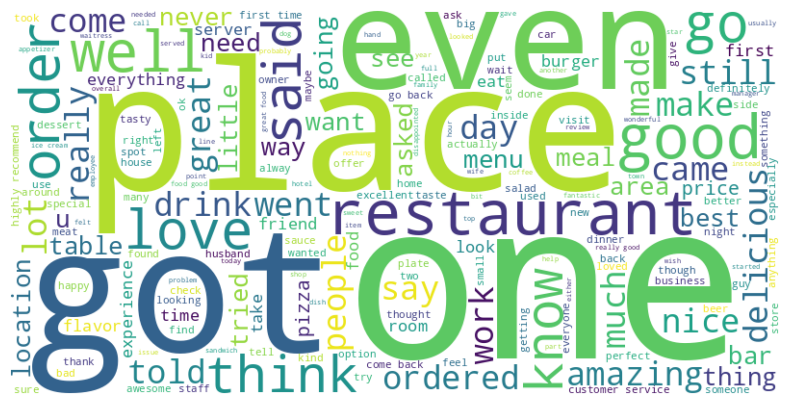

In [17]:
from pyspark.ml.feature import Tokenizer, CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Descargar las palabras vacías si aún no las tienes
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Personaliza según tu idioma

# Muestreo Aleatorio
sampled_df = df.sample(withReplacement=False, fraction=0.01, seed=42)  # Ejemplo: muestreo del 1%

# Tokenización
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
df_tokenizado = tokenizer.transform(sampled_df)

# Conteo de Palabras con filtrado de palabras vacías
count_vectorizer = CountVectorizer(inputCol="tokens", outputCol="features", vocabSize=1000, minDF=2.0)
cv_model = count_vectorizer.fit(df_tokenizado)
df_palabras_contadas = cv_model.transform(df_tokenizado)

# Obtener las palabras y contar su frecuencia
palabras = df_palabras_contadas.select("tokens").rdd.flatMap(lambda x: x[0]).collect()

# Filtrar palabras vacías y convertir a minúsculas
palabras_filtradas = [word.lower() for word in palabras if word.lower() not in stop_words]

# Generación de la Nube de Palabras
texto = " ".join(palabras_filtradas)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto)

# Visualización de la Nube de Palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Según la nube de palabras obtenidas por muestra aleatoria debido al volumen de data, las palabras utilizadas principalmente en las reseñas que se encuentran en la columna text, son en su mayoría palabras de uso común o no son con sentido negativo.

### Gráficos de barras

+-----+-------+
|stars|  count|
+-----+-------+
|  1.0|1069561|
|  4.0|1452918|
|  3.0| 691934|
|  2.0| 544240|
|  5.0|3231627|
+-----+-------+



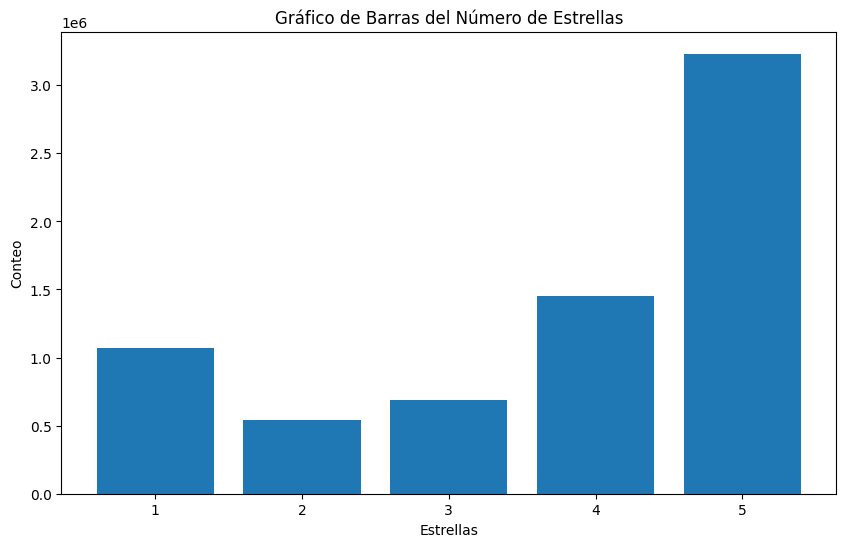

In [18]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Calcula el recuento de valores únicos en la columna 'stars'
counts = df.groupBy('stars').count()

# Utiliza la función 'show' para visualizar el recuento de valores
counts.show()

# Para crear un gráfico de barras, puedes utilizar la función 'toPandas' y Matplotlib
counts_pandas = counts.toPandas()

# Utiliza el comando mágico %matplotlib inline si estás en Jupyter Notebook
%matplotlib inline

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(counts_pandas['stars'], counts_pandas['count'])
plt.xlabel('Estrellas')
plt.ylabel('Conteo')
plt.title('Gráfico de Barras del Número de Estrellas')
plt.show()



La mayoría de reseñas son de 4 y 5 estrellas, aunque también hay un número significativo de reseñas con 1 estrella.

### Correlaciones

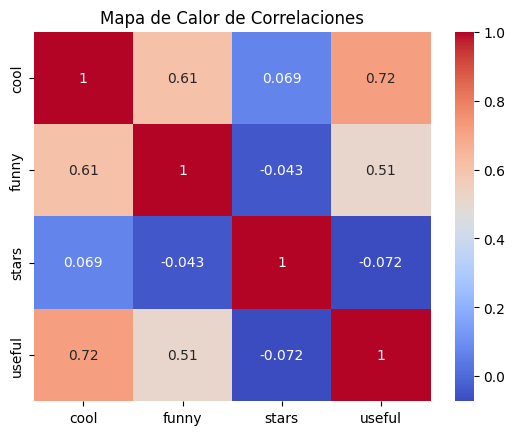

In [21]:
import pandas as pd
import seaborn as sns
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Selecciona las columnas numéricas que deseas analizar
feature_columns = ['cool', 'funny', 'stars', 'useful']

# Crea un ensamblador de vectores
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = vector_assembler.transform(df)

# Calcula la matriz de correlación
corr_matrix = Correlation.corr(df_assembled, "features").collect()[0][0]

# Convierte la matriz de correlación a una lista
corr_list = corr_matrix.toArray().tolist()

# Crea un DataFrame con las correlaciones
corr_df = pd.DataFrame(corr_list, columns=feature_columns, index=feature_columns)

# Visualiza el mapa de calor de correlaciones con seaborn
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


Según el mapa de correlaciones, a las personas que les resultó útil una reseña también les pareció cool, este patrón se repite igualmente para la relación entre reseñas percibidas como graciosas y cool, y reseñas percibidas como graciosas e útiles, aunque la relación más fuerte la tienen las primeras mencionadas. Las estrellas que le asignó cada persona al restaurante que calificó, como era de esperarse, no tiene una relación significativa con las reacciones que tienen las demás personas a su reseña.